In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


<AxesSubplot:>

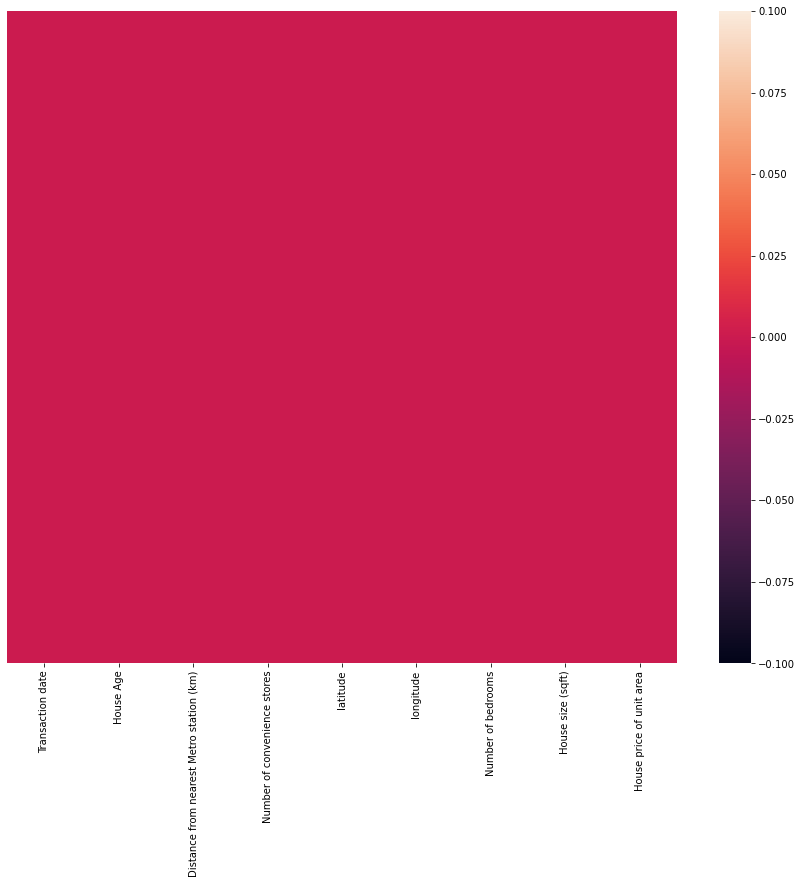

In [4]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(),yticklabels=False)

In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


### EXPLORATORY DATA Analysis

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>]],
      dtype=object)

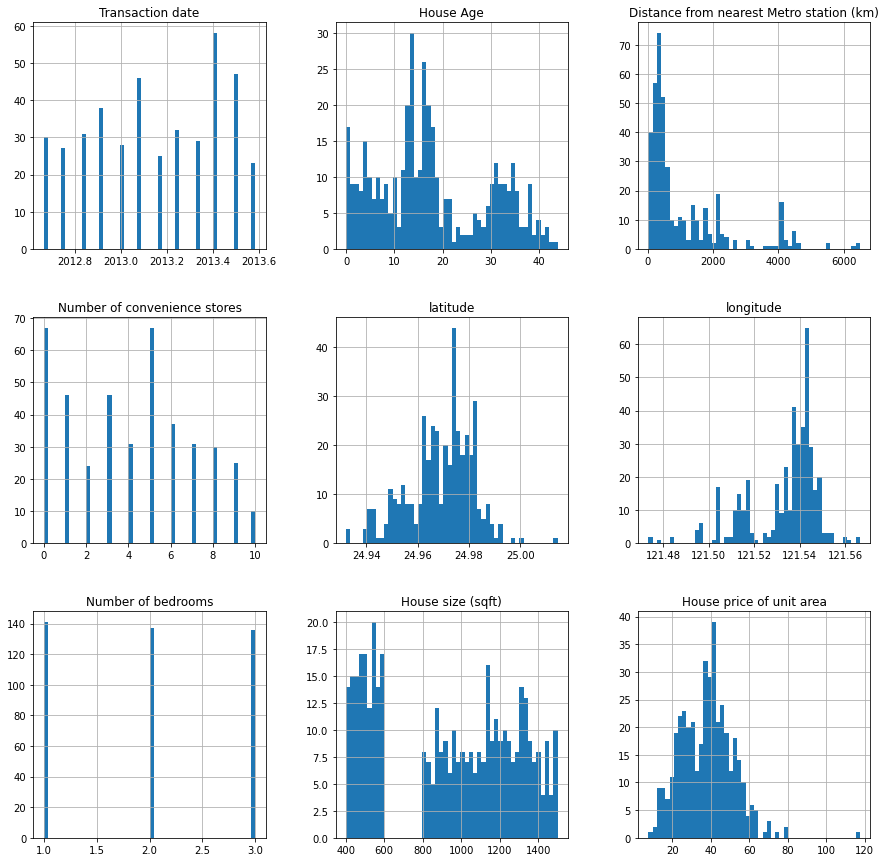

In [6]:
df.hist(bins=50, figsize=(15, 15))

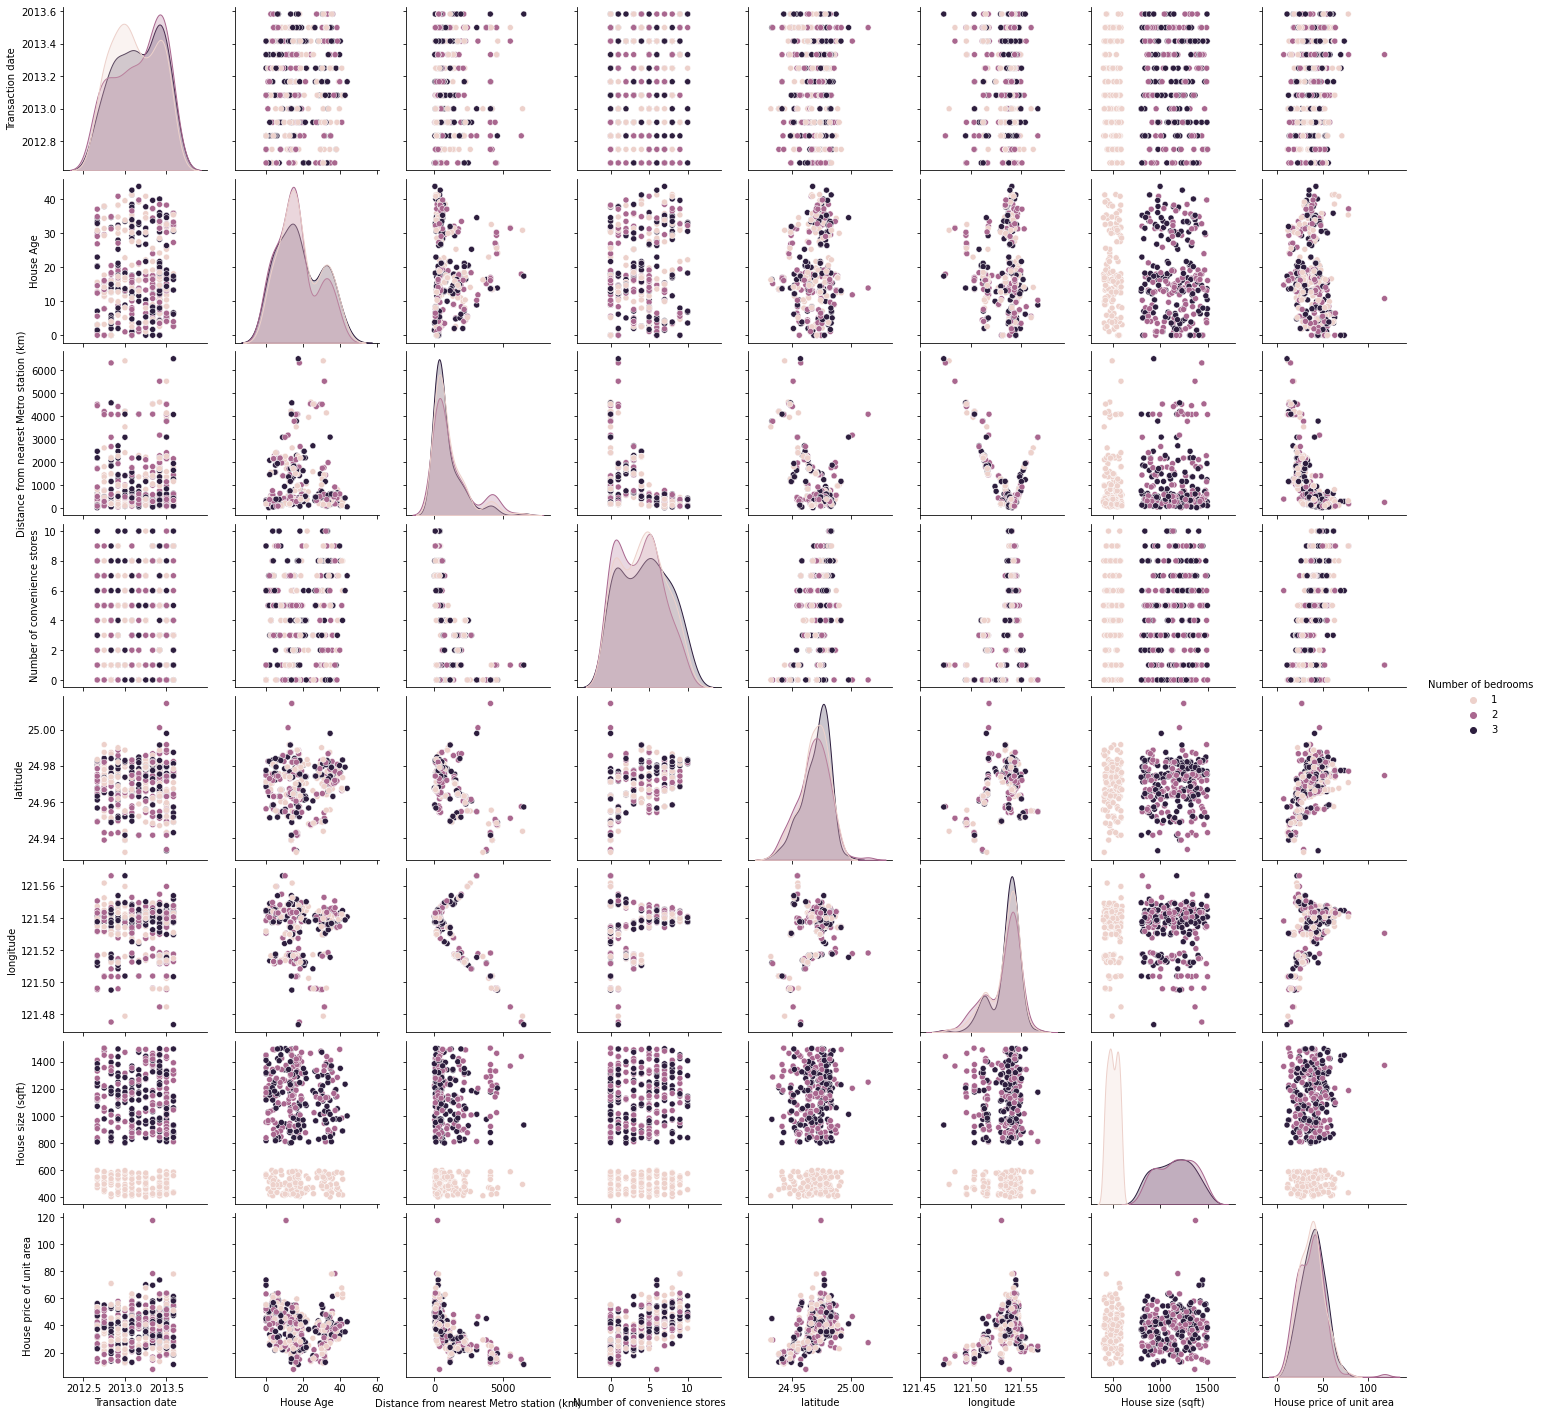

In [7]:
sns.pairplot(df,hue='Number of bedrooms')

## Feature engineering

In [8]:
from geopy.geocoders import Nominatim
#We will use this util to create our string tuple to further locate our longitude and latitudes
df['geom'] = df.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)
#this prints out our newly created "geom" column
print(df.geom[0])
geolocator = Nominatim(user_agent="geoapiExercises")
df['address'] = df.apply(lambda row: geolocator.reverse(row.geom).address,axis=1)

('24.98298', '121.54024')


In [9]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,geom,address
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,"(24.98298, 121.54024)","44-2, 民權路, 復興里, 新店區, 大坪林, 新北市, 23141, 臺灣"
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,"(24.98034, 121.53951)","12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣"
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣"
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣"
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,"(24.97937, 121.54245)","元創機車精品, 20, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣"
...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,"(24.94155, 121.50381)","新店達觀A2社區i郵箱, 達觀路, 達觀里, 新店區, 新北市, 23156, 臺灣"
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,"(24.97433, 121.5431)","北新第一大樓, 寶橋路1巷, 新安里, 新店區, 大坪林, 新北市, 23145, 臺灣"
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,"(24.97923, 121.53986)","17, 大豐路, 明德里, 新店區, 大坪林, 新北市, 231, 臺灣"
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,"(24.96674, 121.54067)","北新牙科, 北新路一段271巷, 新德里, 新店區, 大坪林, 新北市, 23147, 臺灣"


In [10]:
df.to_csv('geopy_data.csv')

In [11]:
def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    pin=address.get('postcode','')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    row['pin']=pin
    return row




In [12]:
df = df.apply(city_state_country, axis=1)

In [13]:
df.to_csv('geopy_data2.csv')
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,geom,address,city,state,country,pin
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,"(24.98298, 121.54024)","44-2, 民權路, 復興里, 新店區, 大坪林, 新北市, 23141, 臺灣",新北市,,臺灣,23141
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,"(24.98034, 121.53951)","12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,"(24.97937, 121.54245)","元創機車精品, 20, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,"(24.94155, 121.50381)","新店達觀A2社區i郵箱, 達觀路, 達觀里, 新店區, 新北市, 23156, 臺灣",新北市,,臺灣,23156
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,"(24.97433, 121.5431)","北新第一大樓, 寶橋路1巷, 新安里, 新店區, 大坪林, 新北市, 23145, 臺灣",新北市,,臺灣,23145
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,"(24.97923, 121.53986)","17, 大豐路, 明德里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,"(24.96674, 121.54067)","北新牙科, 北新路一段271巷, 新德里, 新店區, 大坪林, 新北市, 23147, 臺灣",新北市,,臺灣,23147


In [15]:
df['pin']=df.pin.replace('',0).astype(int)
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,geom,address,city,state,country,pin
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,"(24.98298, 121.54024)","44-2, 民權路, 復興里, 新店區, 大坪林, 新北市, 23141, 臺灣",新北市,,臺灣,23141
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,"(24.98034, 121.53951)","12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,"(24.97937, 121.54245)","元創機車精品, 20, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,"(24.94155, 121.50381)","新店達觀A2社區i郵箱, 達觀路, 達觀里, 新店區, 新北市, 23156, 臺灣",新北市,,臺灣,23156
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,"(24.97433, 121.5431)","北新第一大樓, 寶橋路1巷, 新安里, 新店區, 大坪林, 新北市, 23145, 臺灣",新北市,,臺灣,23145
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,"(24.97923, 121.53986)","17, 大豐路, 明德里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,"(24.96674, 121.54067)","北新牙科, 北新路一段271巷, 新德里, 新店區, 大坪林, 新北市, 23147, 臺灣",新北市,,臺灣,23147


In [16]:
df[df['pin']<2300]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,geom,address,city,state,country,pin
1,2012.916667,19.5,306.5947,9,24.98034,121.53951,2,1240,42.2,"(24.98034, 121.53951)","12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
4,2012.833333,5.0,390.5684,5,24.97937,121.54245,1,491,43.1,"(24.97937, 121.54245)","元創機車精品, 20, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
10,2013.083333,34.8,405.2134,1,24.97349,121.53372,1,466,41.4,"(24.97349, 121.53372)","三民水煎包, 三民路, 福民里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
12,2012.916667,13.0,492.2313,5,24.96515,121.53737,3,1172,39.3,"(24.96515, 121.53737)","148, 環河路, 中華里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
27,2013.250000,10.4,276.4490,5,24.95593,121.53913,3,941,33.6,"(24.95593, 121.53913)","文山國中, 38, 文中路, 文中里, 新店區, 新北市, 231, 臺灣",新北市,,臺灣,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,2013.250000,40.9,122.3619,8,24.96756,121.54230,1,579,67.7,"(24.96756, 121.5423)","立人教育, 7之1, 北新路一段88巷, 五峯里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
391,2013.583333,6.2,1939.7490,1,24.95155,121.55387,3,1494,31.3,"(24.95155, 121.55387)","青潭國小, 80, 北宜路二段, 美潭里, 新店區, 新北市, 231, 臺灣",新北市,,臺灣,231
392,2013.083333,42.7,443.8020,6,24.97927,121.53874,3,1234,35.3,"(24.97927, 121.53874)","25, 大豐路, 明德里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231
404,2013.333333,16.4,289.3248,5,24.98203,121.54348,2,1420,41.2,"(24.98203, 121.54348)","全家便利商店, 211, 中興路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231


In [17]:
df['month%']=df['Transaction date']-df['Transaction date'].astype(int)

In [18]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,geom,address,city,state,country,pin,month%
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,"(24.98298, 121.54024)","44-2, 民權路, 復興里, 新店區, 大坪林, 新北市, 23141, 臺灣",新北市,,臺灣,23141,0.916667
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,"(24.98034, 121.53951)","12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.916667
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669,0.583333
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669,0.500000
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,"(24.97937, 121.54245)","元創機車精品, 20, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,"(24.94155, 121.50381)","新店達觀A2社區i郵箱, 達觀路, 達觀里, 新店區, 新北市, 23156, 臺灣",新北市,,臺灣,23156,0.000000
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,"(24.97433, 121.5431)","北新第一大樓, 寶橋路1巷, 新安里, 新店區, 大坪林, 新北市, 23145, 臺灣",新北市,,臺灣,23145,0.666667
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,"(24.97923, 121.53986)","17, 大豐路, 明德里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.250000
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,"(24.96674, 121.54067)","北新牙科, 北新路一段271巷, 新德里, 新店區, 大坪林, 新北市, 23147, 臺灣",新北市,,臺灣,23147,0.000000


In [19]:
df['month']=(df['month%']*12+1).astype(int)

In [20]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,geom,address,city,state,country,pin,month%,month
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,"(24.98298, 121.54024)","44-2, 民權路, 復興里, 新店區, 大坪林, 新北市, 23141, 臺灣",新北市,,臺灣,23141,0.916667,12
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,"(24.98034, 121.53951)","12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.916667,12
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669,0.583333,7
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669,0.500000,7
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,"(24.97937, 121.54245)","元創機車精品, 20, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.833333,10


In [21]:
df['year']=df['Transaction date'].astype(int)

In [22]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,geom,address,city,state,country,pin,month%,month,year
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,"(24.98298, 121.54024)","44-2, 民權路, 復興里, 新店區, 大坪林, 新北市, 23141, 臺灣",新北市,,臺灣,23141,0.916667,12,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,"(24.98034, 121.53951)","12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.916667,12,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669,0.583333,7,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,"(24.98746, 121.54391)","寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣",新北市,,臺灣,11669,0.500000,7,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,"(24.97937, 121.54245)","元創機車精品, 20, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.833333,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,"(24.94155, 121.50381)","新店達觀A2社區i郵箱, 達觀路, 達觀里, 新店區, 新北市, 23156, 臺灣",新北市,,臺灣,23156,0.000000,1,2013
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,"(24.97433, 121.5431)","北新第一大樓, 寶橋路1巷, 新安里, 新店區, 大坪林, 新北市, 23145, 臺灣",新北市,,臺灣,23145,0.666667,9,2012
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,"(24.97923, 121.53986)","17, 大豐路, 明德里, 新店區, 大坪林, 新北市, 231, 臺灣",新北市,,臺灣,231,0.250000,4,2013
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,"(24.96674, 121.54067)","北新牙科, 北新路一段271巷, 新德里, 新店區, 大坪林, 新北市, 23147, 臺灣",新北市,,臺灣,23147,0.000000,1,2013


In [23]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'geom', 'address', 'city', 'state', 'country', 'pin', 'month%', 'month',
       'year'],
      dtype='object')

In [24]:
df.drop(columns=['geom', 'address', 'city', 'state', 'country','month%'],inplace=True)

In [25]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,pin,month,year
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,23141,12,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,231,12,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,11669,7,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,11669,7,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,231,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,23156,1,2013
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,23145,9,2012
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,231,4,2013
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,23147,1,2013


array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Number of bedrooms'}>,
        <AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>],
       [<AxesSubplot:title={'center':'pin'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

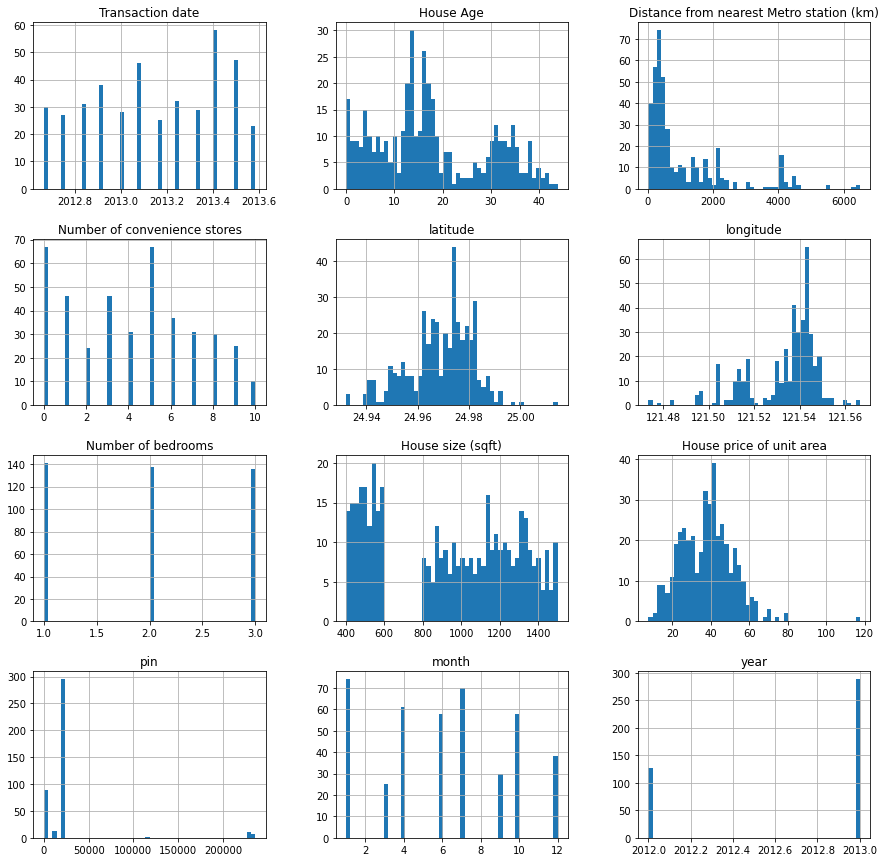

In [26]:
df.hist(bins=50, figsize=(15, 15))

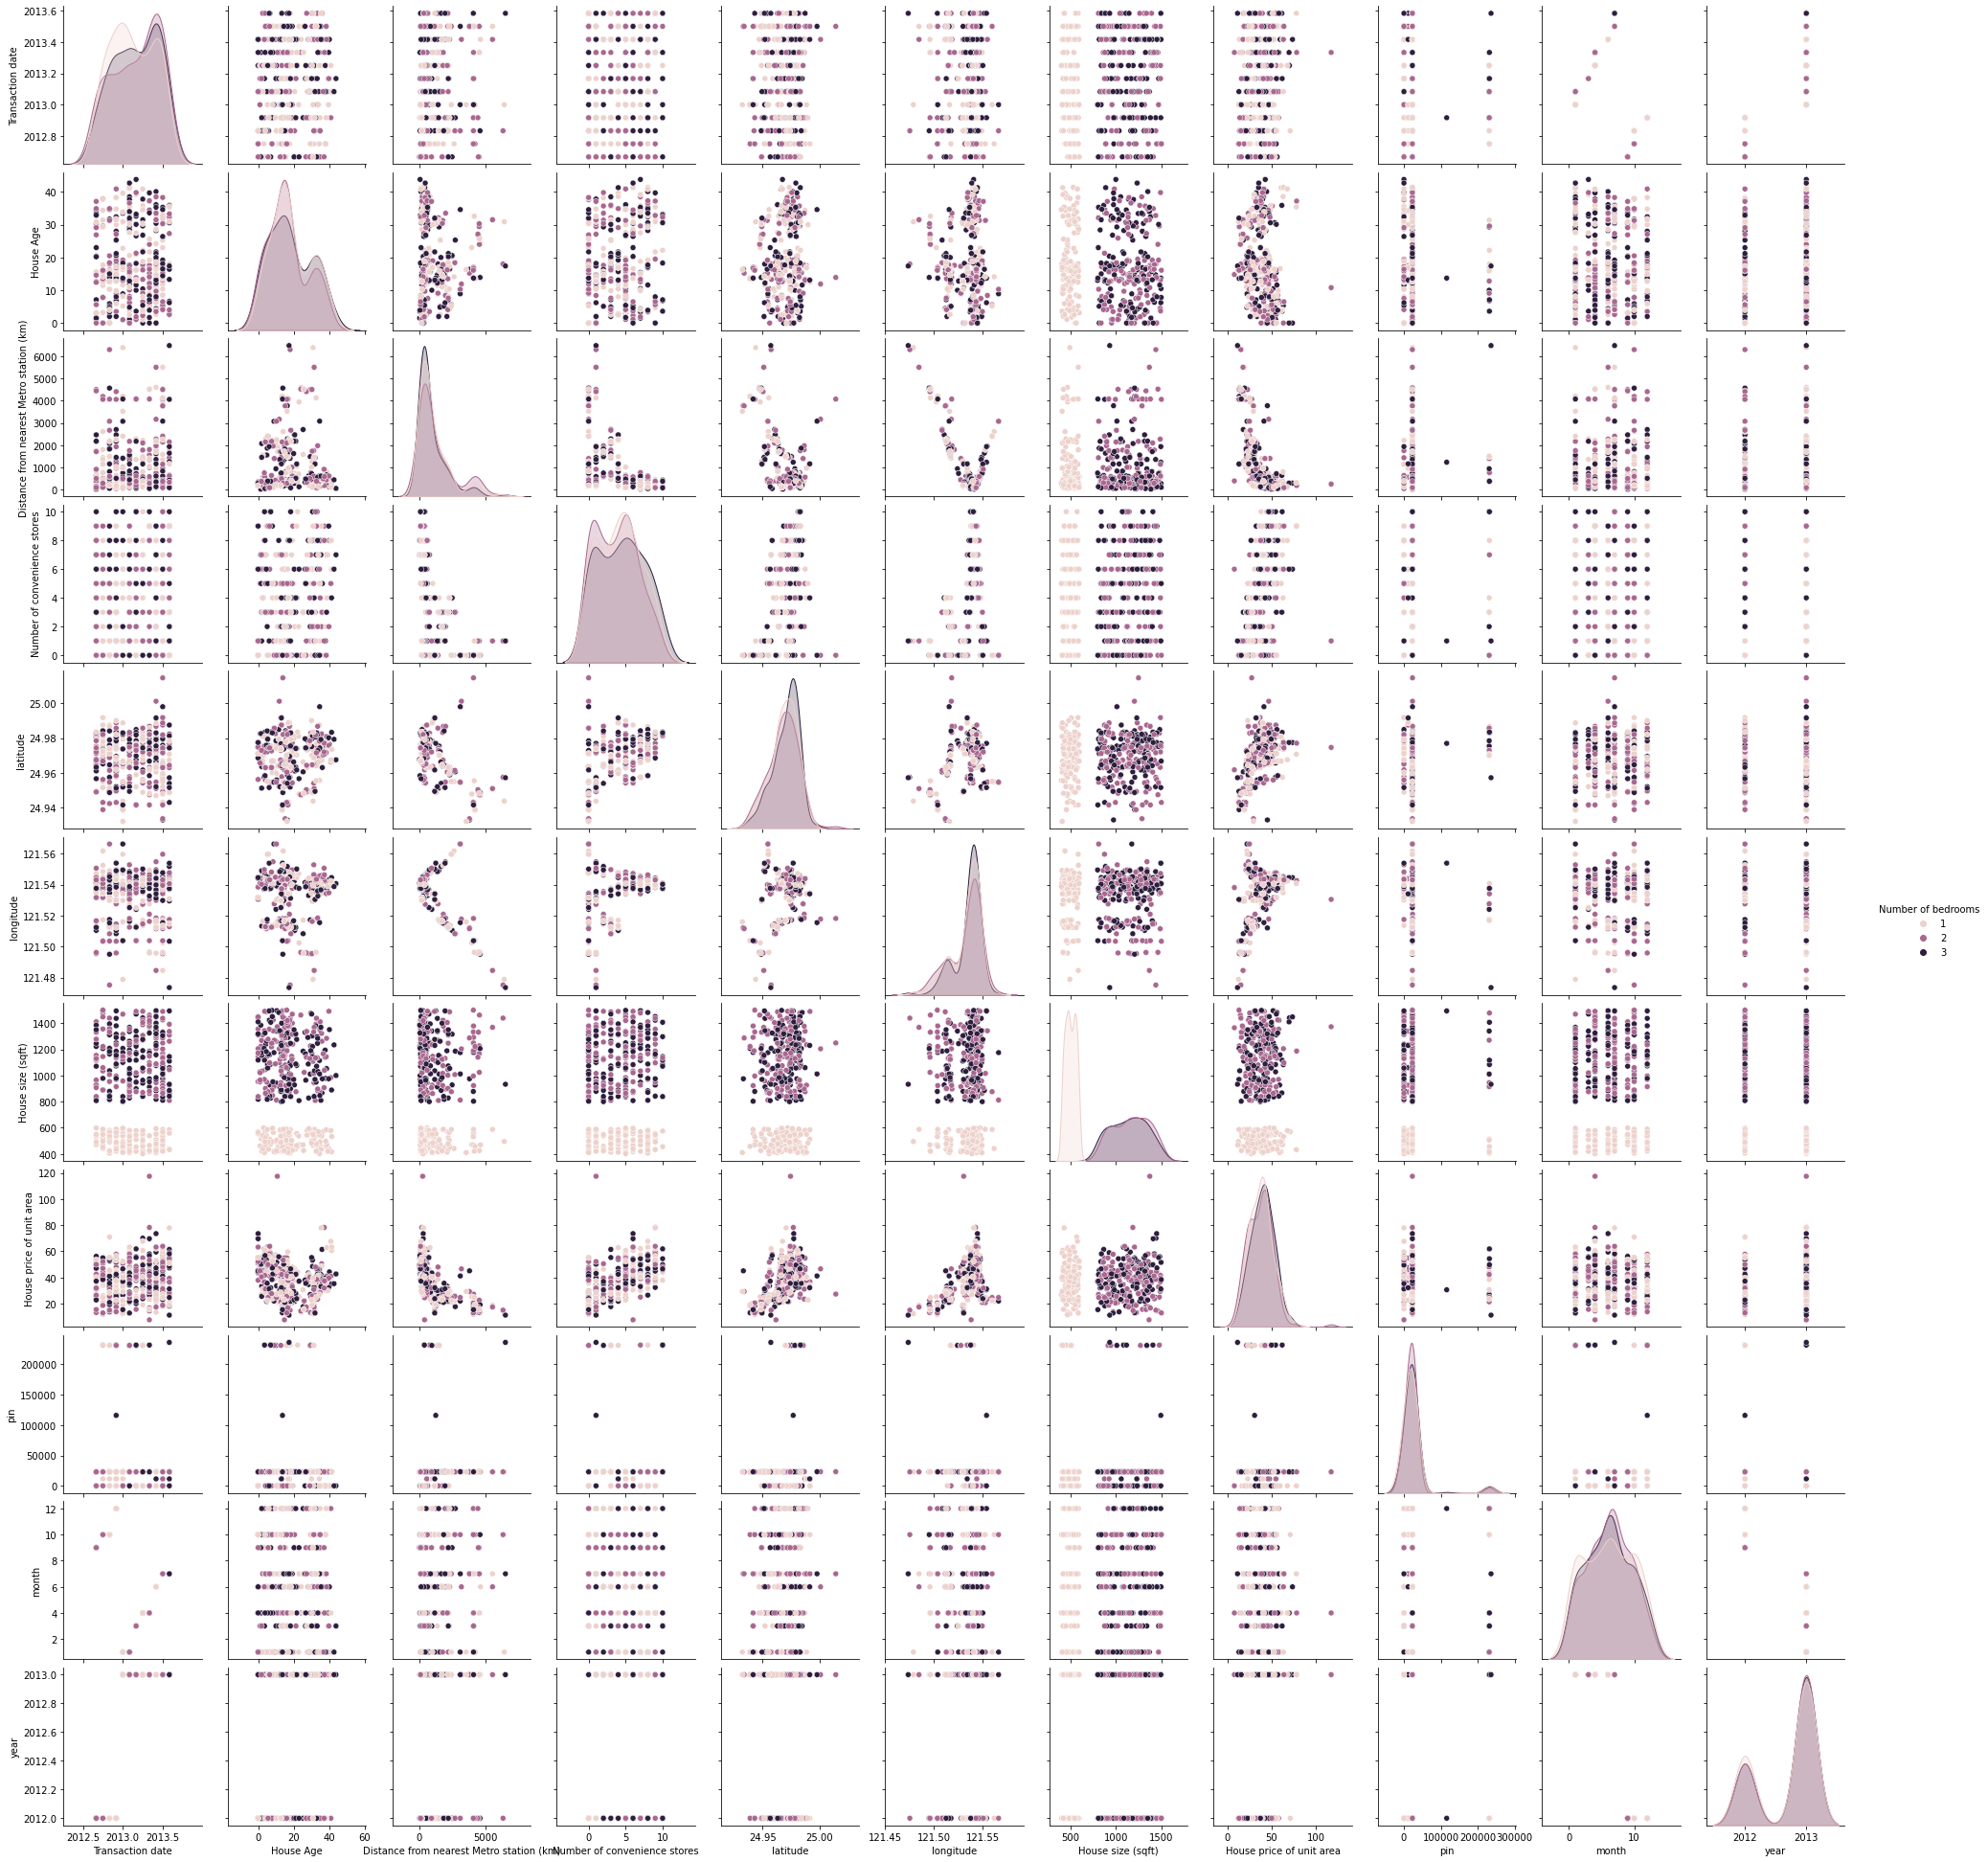

In [27]:
sns.pairplot(df,hue='Number of bedrooms')

In [28]:
df2=df.drop(columns=['pin'])

In [29]:
df2

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,month,year
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,12,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,12,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,7,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,7,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,10,2012
...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,1,2013
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,9,2012
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,4,2013
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,1,2013


In [30]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,pin,month,year
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529,-0.032260,-0.334001,0.817308
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567,-0.055127,-0.064605,0.049171
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,0.103392,0.040856,0.016519
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,-0.036487,0.022800,-0.005586
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.119696,0.017083,0.008118
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,-0.151846,-0.065684,0.013177
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,0.012448,0.002255,0.028743
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,-0.021148,0.019074,0.025156
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,-0.057417,-0.054210,0.081545
pin,-0.032260,-0.055127,0.103392,-0.036487,0.119696,-0.151846,0.012448,-0.021148,-0.057417,1.000000,0.004050,-0.025258


In [31]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'pin', 'month', 'year'],
      dtype='object')

In [32]:
input_cols=['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area', 'month', 'year']

In [33]:
output_cols='House price of unit area'

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[input_cols], df[output_cols], test_size=0.33)

In [35]:
X_train

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,month,year
6,2012.666667,34.5,623.4731,7,24.97933,121.53642,3,1115,40.3,9,2012
405,2012.666667,23.0,130.9945,6,24.95663,121.53765,3,808,37.2,9,2012
313,2013.333333,8.3,104.8101,5,24.96674,121.54067,3,952,42.8,4,2013
314,2013.250000,3.7,577.9615,6,24.97201,121.54722,2,1491,41.6,4,2013
218,2013.416667,13.6,492.2313,5,24.96515,121.53737,2,1455,43.8,6,2013
...,...,...,...,...,...,...,...,...,...,...,...
300,2013.083333,2.5,156.2442,4,24.96696,121.53992,1,543,36.9,1,2013
197,2013.250000,34.4,126.7286,8,24.96881,121.54089,1,548,48.2,4,2013
355,2013.250000,3.8,383.8624,5,24.98085,121.54391,1,493,60.7,4,2013
263,2013.416667,3.9,2147.3760,3,24.96299,121.51284,1,475,31.7,6,2013


## Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [37]:
scaler= MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Training and evaluation

In [38]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
models=[LinearRegression(),RidgeCV(),LassoCV(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),ExtraTreesRegressor(),XGBRegressor(),XGBRFRegressor(),CatBoostRegressor(verbose=False),LGBMRegressor()]

In [59]:
my_dict = {'model': [],
                'train_rmse': [],
                'val_rmse': [] ,'r2score': []}
 
# df = pd.DataFrame(initial_data, columns = [])

In [60]:
def train_and_evaluate(model,X_train,y_train, X_test,y_test):
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test,squared=False)
    r2score = r2_score( y_test,model.predict(X_test))
    print(train_rmse),print(val_rmse),print(r2score)

In [63]:

for model in models:
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test,squared=False)
    r2score = r2_score( y_test,model.predict(X_test))
    my_dict['model'].append(str(model))
    my_dict['train_rmse'].append(train_rmse)
    my_dict['val_rmse'].append(val_rmse)
    my_dict['r2score'].append(r2score)
    
res = pd.DataFrame(my_dict)

In [64]:
res

,model,train_rmse,val_rmse,r2score
0,LinearRegression(),1.004675e-13,9.807868e-14,1.000000
1,RidgeCV(),3.999365e-05,3.590971e-05,1.000000
2,LassoCV(),1.019547e+00,8.112032e-01,0.996075
3,SVR(),1.073912e+01,8.481992e+00,0.570854
4,DecisionTreeRegressor(),7.394536e-16,9.732180e-01,0.994350
5,RandomForestRegressor(),1.109682e+00,5.464935e-01,0.998219
6,AdaBoostRegressor(),1.415348e+00,1.504591e+00,0.986497
7,ExtraTreesRegressor(),5.430917e-14,2.697371e-01,0.999566
8,"XGBRegressor(base_score=0.5, booster='gbtree',...",3.835534e-03,6.551836e-01,0.997439
9,"XGBRFRegressor(base_score=0.5, booster='gbtree...",8.298234e-01,1.283445e+00,0.990174


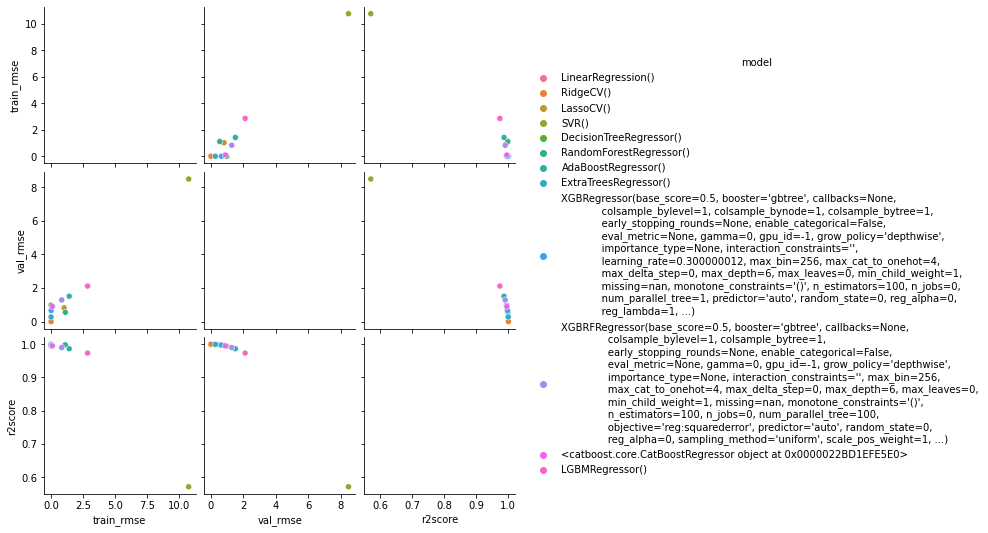

In [71]:
sns.pairplot(res,hue="model")

### We can see Simple linear model **linear regression** gave the lowest loss and highest r2_score for our data .
- So LinearRegression is very good model for this data
 - train_rmse	1.004675e-13	validation_rmse=9.807868e-14	r2score=1.000000



In [81]:
res.head(1)

,model,train_rmse,val_rmse,r2score
0,LinearRegression(),1.004675e-13,9.807868e-14,1.0
